# csv 파일 불러오기, DataFrame 생성

파일명: 제품명_modeling.csv 데이터 불러오기
* csv 파일은 작업 상태인 리뷰 중 카테고리가 빈 것은 제거 후 가져온다.

In [92]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import pandas as pd
import re
import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_rows', 30) # row 생략 없이 출력
pd.set_option('display.max_columns', 30) # col 생략 없이 출력

In [94]:
#청소기
path = "/content/drive/MyDrive/lg_modeling/cleaner_modeling.csv"
#냉장고
#path = "/content/drive/MyDrive/lg_modeling/refrigerator_modeling.csv"
#식세기
#path = "/content/drive/MyDrive/lg_modeling/dishwasher_modeling.csv"

data = pd.read_csv(path, sep=',', encoding = 'utf-8')
data.rename(columns={'리뷰 번호' : 'Review_Num', 
                    '리뷰 원문' : 'Original_Comment',
                    '카테고리' : 'Category'}, inplace=True)
data['Category'] = data['Category'].str.split('and')
print(data.shape)
data.tail(20)

(18471, 3)


,Review_Num,Original_Comment,Category
18451,190546,흡입력 최고 짱 좋아요,"[흡입력, 흡입력]"
18452,190554,아이언그레이 깔끔하게 이쁘네요 세련된느낌 청소기 코드있는곳이면 아무곳이나 세워놓을수...,"[핸들링, 디자인, 디자인, 동작편리성, 유지관리, 무게, 핸들링, 청소가능영역]"
18453,190557,엄마 사드렸는데 가볍고 흡입도 잘되고 좋다고 하시네요,"[흡입력, 흡입력, 무게]"
18454,190561,소음 적고 흡입력 맘에 들어요 헤드도 이리저리 회전 잘되고 넘나 맘에 들어요,"[소음, 흡입력, 핸들링]"
18455,190564,배송 빨랐어요 가끔 많이 기다린단 답이 있었는데 삼일 정도만에 왔어요 다이에 비하면...,"[흡입력, 무게, 기타, 기타, 배터리]"
18456,190565,무선 청소기 쓰다가 쓰니까 아무래도 좀 무겁고 소음이 크고 자리는 많이 차지하긴 하...,"[흡입력, 흡입력, 무게, 소음, 디자인, 배터리]"
18457,190568,택배사 파업으로 그랬는지 출고는 빨랐는데 실제로 받은 데는 며칠 걸렸어요 가볍고 부...,"[무게, 동작편리성, 소음]"
18458,190570,크기가좀작아도짱짱해요,[디자인]
18459,190571,코드제로 물걸레키트장점1코드제로 하나만 있으면 되니 공간절약이 된다2 자동 물공급기...,"[배터리, 디자인, 동작편리성, 무게]"
18460,190581,잘 사용하고있습니다 헤드가 두꺼워 불편한거 빼면편리합니다,[동작편리성]


In [95]:
#####---- NaN값 제거 ----#####
data = data.dropna(axis=0, how='any')
data = data.reset_index(drop=True)
data.isna().sum()

Review_Num          0
Original_Comment    0
Category            0
dtype: int64

In [96]:
#####---- 중복 제거 ----#####
all_categorys = []
for i in range(len(data)):
  data['Category'][i] = list(set(data['Category'][i]))
  all_categorys += data['Category'][i]
print(data.shape)
data.tail(20)

(18471, 3)


,Review_Num,Original_Comment,Category
18451,190546,흡입력 최고 짱 좋아요,[흡입력]
18452,190554,아이언그레이 깔끔하게 이쁘네요 세련된느낌 청소기 코드있는곳이면 아무곳이나 세워놓을수...,"[무게, 디자인, 동작편리성, 청소가능영역, 핸들링, 유지관리]"
18453,190557,엄마 사드렸는데 가볍고 흡입도 잘되고 좋다고 하시네요,"[무게, 흡입력]"
18454,190561,소음 적고 흡입력 맘에 들어요 헤드도 이리저리 회전 잘되고 넘나 맘에 들어요,"[흡입력, 핸들링, 소음]"
18455,190564,배송 빨랐어요 가끔 많이 기다린단 답이 있었는데 삼일 정도만에 왔어요 다이에 비하면...,"[무게, 흡입력, 기타, 배터리]"
18456,190565,무선 청소기 쓰다가 쓰니까 아무래도 좀 무겁고 소음이 크고 자리는 많이 차지하긴 하...,"[무게, 디자인, 소음, 흡입력, 배터리]"
18457,190568,택배사 파업으로 그랬는지 출고는 빨랐는데 실제로 받은 데는 며칠 걸렸어요 가볍고 부...,"[무게, 동작편리성, 소음]"
18458,190570,크기가좀작아도짱짱해요,[디자인]
18459,190571,코드제로 물걸레키트장점1코드제로 하나만 있으면 되니 공간절약이 된다2 자동 물공급기...,"[배터리, 동작편리성, 디자인, 무게]"
18460,190581,잘 사용하고있습니다 헤드가 두꺼워 불편한거 빼면편리합니다,[동작편리성]


# 리뷰 전처리

### 불필요한 문자열 제거 (리뷰 원문 전처리)

In [97]:
# html태그 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'<[^>]*>', repl=r'', regex=True)

# email 주소 제거
data['Original_Comment']=data['Original_Comment'].str.replace(pat=r'(\[a-zA-Z0-9\_.+-\]+@\[a-zA-Z0-9-\]+.\[a-zA-Z0-9-.\]+)', 
                                             repl=r'', regex=True)

# _제거
data['Original_Comment']=data['Original_Comment'].str.replace('_', '')

# \r, \n 제거
data['Original_Comment']=data['Original_Comment'].str.replace(pat=r'[\r|\n]', repl=r'', regex=True)

# url 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*',repl=r'', regex=True)

# 자음, 모음 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'([ㄱ-ㅎㅏ-ㅣ]+)', repl=r'', regex=True)

# 특수 기호 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'[^\w\s]', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace('1n', '')
data['Original_Comment'] = data['Original_Comment'].str.replace('_', '')

# 모두 영어인 행 공백으로 대체
data['Original_Comment'] =data['Original_Comment'].str.replace(pat=r'^[a-zA-Z\s]+$', repl=r'', regex=True)

# 모두 숫자인 행 공백으로 대체
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'^[0-9\s]+$', repl=r'', regex=True)

# 좌우 공백 제거
data['Original_Comment']= data['Original_Comment'].str.strip()

# 아이디 관련 단어 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'ID\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'아이디\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'id\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'ID[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'아이디[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'id[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'ID\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'아이디\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'id\s', repl=r'', regex=True)

# 주문번호 관련 단어 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'주문번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'결제번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'구매번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'주문\s번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'결제\s번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'구매\s번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'주문번호\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'결제번호\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'구매번호\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'주문\s번호\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'결제\s번호\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'구매\s번호\s', repl=r'', regex=True)

In [98]:
data.head(10)

,Review_Num,Original_Comment,Category
0,117695,쿨내나는 서비스죠 근데 진짜 잔고장 자꾸 나는건 어찌 해결좀 하셔야 할듯해여서비스센...,[견고성]
1,117699,흡입은 확실히 만족 만족 좋아요,[흡입력]
2,117703,저는 포메엄마다 보니까 정말 털청소하는데 매일 고민인데요건 일단 원터치먼지비움까지 ...,"[유지관리, 디자인]"
3,117704,이것도 가볍진 않습니다 대신 원터치로 모든걸 할 수 있어서 행복해요 먼지비움도 ...,"[무게, 유지관리]"
4,117713,금속망 필터 안에 얇은 솔로 청결하게 할 수 있어 한 수 배우고 갑니다 깨끗해야 ...,[위생]
5,117715,흡입력 좋아요 무게도 그렇게 무겁지 않고,[무게]
6,117717,충전도 자동 먼지비움도 알아서 해 주니 뭐 그냥 너무 좋은거 있죠,[유지관리]
7,117722,저는 타마h14 로청 구매해서 사용중이에요 요즘 나온 제품이라 그런지 센서가 좋아서...,"[흡입력, 기타]"
8,117724,우와 깔끔 청소해야 흡입 잘 되고 항상 깨끗 좋아요,[흡입력]
9,117729,물걸레 같이 할 수 있으니 너무 좋아요 매번 청소기 돌리고 물걸레질 했는데 이제...,[유지관리]


# 데이터 증강하기
1. konlpy의 조사 제거 모듈 사용하여 조사 없는 데이터 생성(참고 자료 : https://cd-programming.tistory.com/215)
2. textaugment 라이브러리 사용하여 20% 삭제하거나 일부분 shuffle하게 만들었음(참고 자료 : https://github.com/dsfsi/textaugment.git)


In [99]:
##### ---- 300개 이하인 데이터만 추출(기준은 언제든지 바꿔도 됨!) ---- #####
import collections
category_counts = dict(collections.Counter(all_categorys))
category_plus = []
for i in category_counts:
  if category_counts[i] <= 300:
    category_plus.append(i)
print(category_counts)
print(category_plus)

review_number, review_original, review_category = [], [], []
for i in range(len(data['Category'])):
  for k in data['Category'][i]:
    if k in category_plus:
      review_number.append(data['Review_Num'][i])
      review_original.append(data['Original_Comment'][i])
      review_category.append(data['Category'][i])
      break
under_300 = pd.DataFrame({'Review_Num':review_number, 'Original_Comment':review_original, 'Category':review_category})
under_300.shape

{'견고성': 343, '흡입력': 7785, '유지관리': 1123, '디자인': 3729, '무게': 5374, '위생': 356, '기타': 488, '배터리': 803, '소음': 4672, '동작편리성': 1318, '핸들링': 775, '정보성': 37, '조립성': 363, '청소가능영역': 610, '조작편리성': 374, '안전성': 53, '그립감': 77, '시인성가독성': 85, '사운드': 34, '촉감': 5}
['정보성', '안전성', '그립감', '시인성가독성', '사운드', '촉감']


(288, 3)

In [100]:
!pip install numpy nltk gensim textblob googletrans
!pip install textaugment
!pip install tqdm
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:
from konlpy.tag import Okt  

def josa_deletion(sentence):
	tagged_sentences =[]
	sentences = []
	pos_tags = []
	tokenizer = Okt()
	temp_X = tokenizer.pos(sentence)
	tagged_sentences.append(temp_X)

	for tagged_sentence in tagged_sentences:
		sentence, tag_info = zip(*tagged_sentence)
		sentences.append(list(sentence))
		pos_tags.append(list(tag_info))
	sentences = sentences[0]
	pos_tags = pos_tags[0]

	idx = [ i for i, value in enumerate(pos_tags) if "Josa" in value]

	if len(idx) != 0:
		for n in idx:
			sentences[n]= None

		new_sentence= list(filter(None, sentences))

		new_sen = ""
		for i in new_sentence:
			new_sen = new_sen + " " + i
	else:
		new_sen = ""

	return new_sen

In [102]:
from tqdm import tqdm_notebook
from textaugment import EDA
import nltk
nltk.download('stopwords')
t = EDA()
review_number, review_original, review_category = [], [], []

for i in tqdm_notebook(range(len(under_300))):

  # 조사 제거하는 모듈
  review_number.append(under_300['Review_Num'][i])
  review_original.append(josa_deletion(under_300['Original_Comment'][i]))
  review_category.append(under_300['Category'][i])

  # 문장에서 20%만 삭제하는 모듈
  temp = t.random_deletion(under_300['Original_Comment'][i], p=0.2)
  review_number.append(under_300['Review_Num'][i])
  review_original.append(temp)
  review_category.append(under_300['Category'][i])

  # 문장에서 1번, 2번, 3번, 4번 셔플하는 모듈
  for k in range(4):
    temp = t.random_swap(under_300['Original_Comment'][i], n=k+1)
    review_number.append(under_300['Review_Num'][i])
    review_original.append(temp)
    review_category.append(under_300['Category'][i])
data_plus = pd.DataFrame({'Review_Num':review_number, 'Original_Comment':review_original, 'Category':review_category})
result_data = data.append(data_plus, ignore_index = True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  0%|          | 0/288 [00:00<?, ?it/s]

In [103]:
print('증강 대상 데이터 개수 : ', under_300.shape, "증강 후 데이터 개수 : ", data_plus.shape)
print('원래 데이터 개수: ', data.shape, '증강 후 데이터 개수: ', result_data.shape)
result_data.tail(20)

증강 대상 데이터 개수 :  (288, 3) 증강 후 데이터 개수 :  (1728, 3)
원래 데이터 개수:  (18471, 3) 증강 후 데이터 개수:  (20199, 3)


,Review_Num,Original_Comment,Category
20179,190093,단점이 2개 a9이 쓰는데 다 나아요 외출시에만 구석구석 못하고 갓던길만 청소하는 ...,"[사운드, 청소가능영역]"
20180,190093,저 구석구석 다 2개 a9이 로봇청소기는 나아요 쓰는데 못하고 갓던길만 커서 단점이...,"[사운드, 청소가능영역]"
20181,190296,소리 크지 않고 부드럽게 움직이는 것 같아요 그리고 바로 흡입 먼지 보니니 청소 ...,"[핸들링, 시인성가독성, 소음]"
20182,190296,소리도 크지않고 부드럽게 움직이는 그리고 바로 흡입한 먼지가 보니니 나네요,"[핸들링, 시인성가독성, 소음]"
20183,190296,맛이 크지않고 부드럽게 움직이는 것같아요 그리고 바로 흡입한 먼지가 보니니 청소하는...,"[핸들링, 시인성가독성, 소음]"
20184,190296,소리도 먼지가 부드럽게 바로 것같아요 그리고 움직이는 흡입한 크지않고 보니니 청소하...,"[핸들링, 시인성가독성, 소음]"
20185,190296,소리도 바로 부드럽게 청소하는 것같아요 그리고 크지않고 먼지가 흡입한 보니니 움직이...,"[핸들링, 시인성가독성, 소음]"
20186,190296,소리도 것같아요 크지않고 움직이는 맛이 그리고 바로 흡입한 먼지가 청소하는 보니니 ...,"[핸들링, 시인성가독성, 소음]"
20187,190478,너무 너무 좋아요 이전 쓰던 청소기 싸이 킹 였는데 8년 을쓰다보니 수명 다 했어...,"[청소가능영역, 흡입력, 시인성가독성, 소음]"
20188,190478,쓰던 청소기도 8년을쓰다보니 이번에도검색해보니 싸이킹 요상품이 후기가 젤좋더라구요 ...,"[청소가능영역, 흡입력, 시인성가독성, 소음]"


# 새로운 DataFrame 생성 (해당하는 제품군에 맞게 선택)- 해당하는 제품군만 실행

In [104]:
new_df = pd.DataFrame({"original_comment": result_data['Original_Comment'], "category":result_data['Category']})

In [105]:
#청소기에 해당하는 카테고리를 열에 추가
new_df['소음']=0
new_df['사운드']=0
new_df['위생']=0
new_df['디자인']=0
new_df['그립감']=0
new_df['청소가능영역']=0
new_df['무게']=0
new_df['촉감']=0
new_df['핸들링']=0
new_df['동작편리성']=0
new_df['조작편리성']=0
new_df['조립성']=0
new_df['유지관리']=0
new_df['정보성']=0
new_df['흡입력']=0
new_df['배터리']=0
new_df['견고성']=0
new_df['안전성']=0
new_df['시인성가독성']=0
new_df['기타']=0

In [106]:
# #냉장고에 해당하는 카테고리를 열에 추가
# new_df['소음']=0
# new_df['사운드']=0
# new_df['위생']=0
# new_df['디자인']=0
# new_df['조명']=0
# new_df['촉감']=0
# new_df['동작편리성']=0
# new_df['조작편리성']=0
# new_df['공간효율성']=0
# new_df['조립성']=0
# new_df['유지관리']=0
# new_df['정보성']=0
# new_df['견고성']=0
# new_df['안전성']=0
# new_df['시인성가독성']=0
# new_df['기타']=0

In [107]:
# #식세기에 해당하는 카테고리를 열에 추가
# new_df['소음']=0
# new_df['사운드']=0
# new_df['위생']=0
# new_df['디자인']=0
# new_df['촉감']=0
# new_df['동작편리성']=0
# new_df['조작편리성']=0
# new_df['공간효율성']=0
# new_df['조립성']=0
# new_df['유지관리']=0
# new_df['정보성']=0
# new_df['견고성']=0
# new_df['안전성']=0
# new_df['시인성가독성']=0
# new_df['기타']=0

In [108]:
new_df

,original_comment,category,소음,사운드,위생,디자인,그립감,청소가능영역,무게,촉감,핸들링,동작편리성,조작편리성,조립성,유지관리,정보성,흡입력,배터리,견고성,안전성,시인성가독성,기타
0,쿨내나는 서비스죠 근데 진짜 잔고장 자꾸 나는건 어찌 해결좀 하셔야 할듯해여서비스센...,[견고성],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,흡입은 확실히 만족 만족 좋아요,[흡입력],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,저는 포메엄마다 보니까 정말 털청소하는데 매일 고민인데요건 일단 원터치먼지비움까지 ...,"[유지관리, 디자인]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,이것도 가볍진 않습니다 대신 원터치로 모든걸 할 수 있어서 행복해요 먼지비움도 ...,"[무게, 유지관리]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,금속망 필터 안에 얇은 솔로 청결하게 할 수 있어 한 수 배우고 갑니다 깨끗해야 ...,[위생],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20194,없는거에요,[정보성],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20195,설명서가 원래 없는거에요,[정보성],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20196,설명서가 없는거에요 원래,[정보성],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20197,설명서가 원래 없는거에요,[정보성],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 각 리뷰에 해당하는 카테고리의 값을 1로 변경
### ex) [디자인, 동작편리성] -> 디자인 1, 동작편리성 1, 그 외 0

In [109]:
length=len(new_df)

for i in range(length):
    new_df.category[i]
    for l in new_df.category[i]:
        new_df[l][i] = 1

In [110]:
new_df

,original_comment,category,소음,사운드,위생,디자인,그립감,청소가능영역,무게,촉감,핸들링,동작편리성,조작편리성,조립성,유지관리,정보성,흡입력,배터리,견고성,안전성,시인성가독성,기타
0,쿨내나는 서비스죠 근데 진짜 잔고장 자꾸 나는건 어찌 해결좀 하셔야 할듯해여서비스센...,[견고성],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,흡입은 확실히 만족 만족 좋아요,[흡입력],0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,저는 포메엄마다 보니까 정말 털청소하는데 매일 고민인데요건 일단 원터치먼지비움까지 ...,"[유지관리, 디자인]",0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,이것도 가볍진 않습니다 대신 원터치로 모든걸 할 수 있어서 행복해요 먼지비움도 ...,"[무게, 유지관리]",0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,금속망 필터 안에 얇은 솔로 청결하게 할 수 있어 한 수 배우고 갑니다 깨끗해야 ...,[위생],0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20194,없는거에요,[정보성],0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20195,설명서가 원래 없는거에요,[정보성],0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20196,설명서가 없는거에요 원래,[정보성],0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20197,설명서가 원래 없는거에요,[정보성],0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [111]:
new_df = new_df.drop(columns=['category'])
new_df

,original_comment,소음,사운드,위생,디자인,그립감,청소가능영역,무게,촉감,핸들링,동작편리성,조작편리성,조립성,유지관리,정보성,흡입력,배터리,견고성,안전성,시인성가독성,기타
0,쿨내나는 서비스죠 근데 진짜 잔고장 자꾸 나는건 어찌 해결좀 하셔야 할듯해여서비스센...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,흡입은 확실히 만족 만족 좋아요,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,저는 포메엄마다 보니까 정말 털청소하는데 매일 고민인데요건 일단 원터치먼지비움까지 ...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,이것도 가볍진 않습니다 대신 원터치로 모든걸 할 수 있어서 행복해요 먼지비움도 ...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,금속망 필터 안에 얇은 솔로 청결하게 할 수 있어 한 수 배우고 갑니다 깨끗해야 ...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20194,없는거에요,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20195,설명서가 원래 없는거에요,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20196,설명서가 없는거에요 원래,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20197,설명서가 원래 없는거에요,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### 효율적인 코드 실행을 위해 한글로 되있는 열 이름을 영어로 변경

In [112]:
#청소기
new_df.rename(columns={'소음':'noise'}, inplace=True)
new_df.rename(columns={'사운드':'sound'}, inplace=True)
new_df.rename(columns={'위생':'hygienic'}, inplace=True)
new_df.rename(columns={'디자인':'design'}, inplace=True)
new_df.rename(columns={'그립감':'grip'}, inplace=True)
new_df.rename(columns={'청소가능영역':'cleanablearea'}, inplace=True)
new_df.rename(columns={'무게':'weight'}, inplace=True)
new_df.rename(columns={'촉감':'touch'}, inplace=True)
new_df.rename(columns={'핸들링':'handling'}, inplace=True)
new_df.rename(columns={'동작편리성':'movement'}, inplace=True)
new_df.rename(columns={'조작편리성':'operation'}, inplace=True)
new_df.rename(columns={'조립성':'ssembly'}, inplace=True)
new_df.rename(columns={'유지관리':'maintenance'}, inplace=True)
new_df.rename(columns={'정보성':'information'}, inplace=True)
new_df.rename(columns={'흡입력':'power'}, inplace=True)
new_df.rename(columns={'배터리':'battery'}, inplace=True)
new_df.rename(columns={'견고성':'solidity'}, inplace=True)
new_df.rename(columns={'안전성':'safety'}, inplace=True)
new_df.rename(columns={'시인성가독성':'visibility'}, inplace=True)
new_df.rename(columns={'기타':'etc'}, inplace=True)

new_df

,original_comment,noise,sound,hygienic,design,grip,cleanablearea,weight,touch,handling,movement,operation,ssembly,maintenance,information,power,battery,solidity,safety,visibility,etc
0,쿨내나는 서비스죠 근데 진짜 잔고장 자꾸 나는건 어찌 해결좀 하셔야 할듯해여서비스센...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,흡입은 확실히 만족 만족 좋아요,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,저는 포메엄마다 보니까 정말 털청소하는데 매일 고민인데요건 일단 원터치먼지비움까지 ...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,이것도 가볍진 않습니다 대신 원터치로 모든걸 할 수 있어서 행복해요 먼지비움도 ...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,금속망 필터 안에 얇은 솔로 청결하게 할 수 있어 한 수 배우고 갑니다 깨끗해야 ...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20194,없는거에요,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20195,설명서가 원래 없는거에요,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20196,설명서가 없는거에요 원래,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
20197,설명서가 원래 없는거에요,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [113]:
# #냉장고
# new_df.rename(columns={'소음':'noise'}, inplace=True)
# new_df.rename(columns={'사운드':'sound'}, inplace=True)
# new_df.rename(columns={'위생':'hygienic'}, inplace=True)
# new_df.rename(columns={'디자인':'design'}, inplace=True)
# new_df.rename(columns={'조명':'light'}, inplace=True)
# new_df.rename(columns={'촉감':'touch'}, inplace=True)
# new_df.rename(columns={'동작편리성':'movement'}, inplace=True)
# new_df.rename(columns={'조작편리성':'operation'}, inplace=True)
# new_df.rename(columns={'공간효율성':'space'}, inplace=True)
# new_df.rename(columns={'조립성':'ssembly'}, inplace=True)
# new_df.rename(columns={'유지관리':'maintenance'}, inplace=True)
# new_df.rename(columns={'정보성':'information'}, inplace=True)
# new_df.rename(columns={'견고성':'solidity'}, inplace=True)
# new_df.rename(columns={'안전성':'safety'}, inplace=True)
# new_df.rename(columns={'시인성가독성':'visibility'}, inplace=True)
# new_df.rename(columns={'기타':'etc'}, inplace=True)

# new_df

In [114]:
# 식세기

# new_df.rename(columns={'소음':'noise'}, inplace=True)
# new_df.rename(columns={'사운드':'sound'}, inplace=True)
# new_df.rename(columns={'위생':'hygienic'}, inplace=True)
# new_df.rename(columns={'디자인':'design'}, inplace=True)
# new_df.rename(columns={'촉감':'touch'}, inplace=True)
# new_df.rename(columns={'동작편리성':'movement'}, inplace=True)
# new_df.rename(columns={'조작편리성':'operation'}, inplace=True)
# new_df.rename(columns={'공간효율성':'spaceefficiency'}, inplace=True)
# new_df.rename(columns={'조립성':'ssembly'}, inplace=True)
# new_df.rename(columns={'유지관리':'maintenance'}, inplace=True)
# new_df.rename(columns={'정보성':'information'}, inplace=True)
# new_df.rename(columns={'견고성':'solidity'}, inplace=True)
# new_df.rename(columns={'안전성':'safety'}, inplace=True)
# new_df.rename(columns={'시인성가독성':'visibility'}, inplace=True)
# new_df.rename(columns={'기타':'etc'}, inplace=True)

# new_df

# [NLP] 코랩에 konlpy 설치 후 okt 사용해보기 (이 코드에서는 사용 x -> 혹시 나중에 사용할 수도 있기 때문에 설치방법만 보기)

In [115]:
# # bash 셸로 명령어 입력하여 라이브러리 설치하기

# %%bash
# apt-get update
# apt-get install g++ openjdk-8-jdk python-dev python3-dev
# pip3 install JPype1
# pip3 install konlpy

In [116]:
# # JAVA_HOME 환경변수 설정하기

# %env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [117]:
# # 형태소
# print("okt.morphs : ", okt.morphs('흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다'))

# # 명사
# print("okt.nouns : ", okt.nouns('흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다'))

# # 형태소 + 품사
# print("okt.pos : ", okt.pos('흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다'))

# 토큰화 패키지 customized KoNLPy 사용
# 설명 https://wikidocs.net/44249 참고

In [118]:
!pip install customized_konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 잘못 토큰화될 가능성이 높은 일부 단어들을, customized KoNLPy를 통해 토큰으로 직접 지정

In [119]:
from ckonlpy.tag import Twitter

twi = Twitter()

words = [('디자인','Noun')]

for word in words:
    name, poomsa = word
    twi.add_dictionary(name, poomsa)

### 형태소 분석기를 사용하여 토큰화를 하면서 불용어를 제거하여 text_token에 저장

In [120]:
stopwords = ['의', '가', '이', '은', '들', '는', '과', '도', '를', '으로', '에',
             '하다', '을', '이다', '것', '로', '에서', '그', '인', '서', '네요',
             '임', '랑', '게', '요', '에게', '엔']

text_token = []
for sentence in new_df['original_comment']:
    tmp = []
    tmp = twi.morphs(str(sentence), stem=True, norm=True)  #토큰화
    tmp = [word for word in tmp if not word in stopwords]  #불용어 제거
    text_token.append(tmp)

In [121]:
print(text_token[:3])

[['쿨내나다', '서비스', '죠', '근데', '진짜', '잔고', '장', '자꾸', '나다', '어찌', '해결', '좀', '해', '여', '서비스', '센터', '안', '가다', '그냥', '자다', '쓰다'], ['흡입', '확실', '히', '만족', '만족', '좋다'], ['저', '포메', '엄마', '다', '보', '니까', '정말', '털청', '소하', '데', '매일', '고민', '인데', '요건', '일단', '원', '터치', '먼지', '비우다', '까지', '되다', '오', '좋다', '그리', '구', '물걸레', '까지', '한', '방', '되다', '더니', '디자인', '세련', '되다', '청소기', '이렇게', '이쁘다', '일인', '싶다', '어요', '청소기', '새', '로사', '려구', '보다', '중인', '데', '넘다', '좋다', '고']]


### 정수 인코딩 - 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터에 정수 인코딩을 수행. 우선, 훈련 데이터에 대해서 단어 집합(vocaburary)을 만들기

In [122]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_token)

### 아래 결과를 보면단어가 9900개가 넘게 존재. 각 정수는 전체 훈련 데이터에서 등장 빈도수가 높은 순서대로 부여되었기 때문에, 높은 정수가 부여된 단어들은 등장 빈도수가 매우 낮다는 것을 의미.

In [123]:
print(tokenizer.word_index)

{'좋다': 1, '청소기': 2, '보다': 3, '있다': 4, '어요': 5, '청소': 6, '흡입': 7, '하고': 8, '사용': 9, '되다': 10, '자다': 11, '고': 12, '너무': 13, '배송': 14, '같다': 15, '먼지': 16, '해': 17, '쓰다': 18, '다': 19, '소음': 20, '않다': 21, '흡': 22, '만족': 23, '지만': 24, '가볍다': 25, '입력': 26, '해서': 27, '생각': 28, '무선': 29, '한': 30, '들다': 31, '물걸레': 32, '좀': 33, '없다': 34, '디자인': 35, '제품': 36, '어서': 37, '력': 38, '유선': 39, '력도': 40, '가격': 41, '구매': 42, '더': 43, '크다': 44, '무겁다': 45, '잘': 46, '소리': 47, '저': 48, '때': 49, '편하다': 50, '받다': 51, '만': 52, '넘다': 53, '니': 54, '사다': 55, '엘지': 56, '네': 57, '오다': 58, '거': 59, '안': 60, '무게': 61, '하': 62, '정말': 63, '코드': 64, '까지': 65, '기사': 66, '다가': 67, '조금': 68, 'lg': 69, '님': 70, '전': 71, '배터리': 72, '나': 73, '히': 74, '써다': 75, '성능': 76, '다이슨': 77, '많이': 78, '이라': 79, '편': 80, '아주': 81, '빠르다': 82, '제로': 83, '가다': 84, '구입': 85, '설치': 86, '부분': 87, '비우다': 88, '괜찮다': 89, '이쁘다': 90, '수': 91, '맘': 92, '통': 93, '해주': 94, '적다': 95, '기능': 96, '저렴': 97, '면': 98, '불편': 99, '예쁘다': 100, '작다': 101, '빨': 102,

### 빈도수가 낮은 단어들은 자연어 처리에서 배제. 등장 빈도수가 2회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인

### 아래 코드 결과: 등장 빈도가 threshold 값인 2회 미만. 즉, 1회 이하인 단어들은 단어 집합에서 무려 절반 이상을 차지. 하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 1.30%밖에 되지 않습니다. 아무래도 등장 빈도가 1회 이하인 단어들은 자연어 처리에서 별로 중요하지 않을 듯 함. 그래서 이 단어들은 정수 인코딩 과정에서 배제시킴

In [124]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 11804
등장 빈도가 1번 이하인 희귀 단어의 수: 4799
단어 집합에서 희귀 단어의 비율: 40.65570992883768
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.938408050090145


### 등장 빈도수가 1이하인 단어들의 수를 제외한 단어의 개수를 단어 집합의 최대 크기로 제한

In [125]:
# 전체 단어 개수 중 빈도수 1이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 7006


### 케라스 토크나이저의 인자로 넘겨주고 텍스트 시퀀스를 정수 시퀀스로 변환

In [126]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(text_token)

X = tokenizer.texts_to_sequences(text_token)
print('리뷰의 최대 길이 :',max(len(l) for l in X))
print('리뷰의 평균 길이 :',sum(map(len, X))/len(X))

리뷰의 최대 길이 : 358
리뷰의 평균 길이 : 25.080400019802962


In [127]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 120
below_threshold_len(max_len, X)
#문장 길이가 120로 할 경우, 약 97%의 대부분의 샘플을 커버 가능

전체 샘플 중 길이가 120 이하인 샘플의 비율: 98.2276350314372


### 각 리뷰 샘플들에 대해 패딩을 진행

In [128]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X, maxlen = max_len)
X

array([[  0,   0,   0, ..., 179,  11,  18],
       [  0,   0,   0, ...,  23,  23,   1],
       [  0,   0,   0, ...,  53,   1,  12],
       ...,
       [  0,   0,   0, ...,  34, 274, 567],
       [  0,   0,   0, ..., 567,  34, 274],
       [  0,   0,   0, ...,  34, 274, 567]], dtype=int32)

### 16개 카테고리이기 때문에 y에는 16개의 label이 들어가도록 설정

In [129]:
import numpy as np
#청소기
y = np.array(new_df.iloc[:, 1:21])
y

#냉장고
# y = np.array(new_df.iloc[:, 1:17])
# y

#식세기
# y = np.array(new_df.iloc[:, 1:16])
# y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### 모델링을 위해 train, test set 분리

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = np.array(X_train)
X_test = np.array(X_test)

print(len(X_train))
print(len(X_test))

16159
4040


# 모델링 - GRU를 이용한 Multi-label 아키텍처를 이용하여 모델링을 진행

In [131]:
import tensorflow.keras.backend as K

def F1score(y_true, y_pred):
    eps = K.epsilon()
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    real_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    pred_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    recall = true_positives / (real_positives + eps)
    precision = true_positives / (pred_positives + eps)
    f1_score = 2 * (recall * precision) / (recall + precision + eps)
    return f1_score

In [132]:
#청소기
label_names = new_df.columns[1:21] #label 종류
#냉장고
# label_names = new_df.columns[1:17] #label 종류
#식세기
# label_names = new_df.columns[1:16] #label 종류
n_label = len(label_names)

y_train_list = {label_names[i]:y_train[:,i] for i in range(n_label)}
y_test_list = {label_names[i]:y_test[:,i] for i in range(n_label)}

y_train_list

{'noise': array([0, 0, 0, ..., 0, 0, 0]),
 'sound': array([0, 0, 0, ..., 0, 0, 0]),
 'hygienic': array([1, 0, 0, ..., 0, 0, 0]),
 'design': array([0, 1, 0, ..., 0, 0, 0]),
 'grip': array([0, 0, 0, ..., 0, 0, 0]),
 'cleanablearea': array([0, 0, 0, ..., 0, 0, 0]),
 'weight': array([0, 0, 1, ..., 1, 0, 1]),
 'touch': array([0, 0, 0, ..., 0, 0, 0]),
 'handling': array([0, 0, 0, ..., 0, 0, 0]),
 'movement': array([0, 0, 0, ..., 1, 0, 0]),
 'operation': array([0, 0, 0, ..., 0, 0, 0]),
 'ssembly': array([0, 0, 0, ..., 0, 0, 0]),
 'maintenance': array([0, 0, 0, ..., 1, 0, 0]),
 'information': array([0, 0, 0, ..., 0, 0, 0]),
 'power': array([1, 0, 0, ..., 0, 1, 1]),
 'battery': array([0, 0, 0, ..., 0, 0, 0]),
 'solidity': array([0, 0, 0, ..., 0, 0, 0]),
 'safety': array([0, 0, 0, ..., 0, 0, 0]),
 'visibility': array([1, 0, 0, ..., 0, 0, 0]),
 'etc': array([0, 0, 0, ..., 0, 0, 0])}

In [133]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, Dense, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [134]:
def SimpleGRU():
    input_layer = Input(shape=(max_len,))
    embedding_text = Embedding(vocab_size, 256)(input_layer)
    x = GRU(128)(embedding_text)
    x = Dropout(0.5)(x)
    output_layers = [Dense(1, activation="sigmoid", name=label_names[i])(x) for i in range(y.shape[1])]

    model = Model(inputs=input_layer, outputs=output_layers)
    model.compile(loss=['binary_crossentropy']*n_label, optimizer='rmsprop', metrics=[F1score])

    return model


model = SimpleGRU()

In [135]:
callback_list = [EarlyStopping(monitor='val_loss', patience=4),
                ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
history = model.fit(X_train, y_train_list, epochs=20, batch_size=60, validation_split=0.1, callbacks=callback_list)

Epoch 1/20
243/243 [==============================] - 118s 340ms/step - loss: 4.2191 - noise_loss: 0.5171 - sound_loss: 0.0797 - hygienic_loss: 0.1033 - design_loss: 0.4424 - grip_loss: 0.1324 - cleanablearea_loss: 0.1581 - weight_loss: 0.5523 - touch_loss: 0.0309 - handling_loss: 0.1974 - movement_loss: 0.2577 - operation_loss: 0.1191 - ssembly_loss: 0.1186 - maintenance_loss: 0.2410 - information_loss: 0.0902 - power_loss: 0.5070 - battery_loss: 0.1828 - solidity_loss: 0.1072 - safety_loss: 0.1004 - visibility_loss: 0.1371 - etc_loss: 0.1444 - noise_F1score: 0.2488 - sound_F1score: 0.0000e+00 - hygienic_F1score: 5.4870e-04 - design_F1score: 0.2992 - grip_F1score: 0.0000e+00 - cleanablearea_F1score: 5.4870e-04 - weight_F1score: 0.3021 - touch_F1score: 0.0000e+00 - handling_F1score: 0.0044 - movement_F1score: 2.8381e-04 - operation_F1score: 0.0044 - ssembly_F1score: 0.0035 - maintenance_F1score: 7.2622e-04 - information_F1score: 0.0000e+00 - power_F1score: 0.6122 - battery_F1score: 0.0

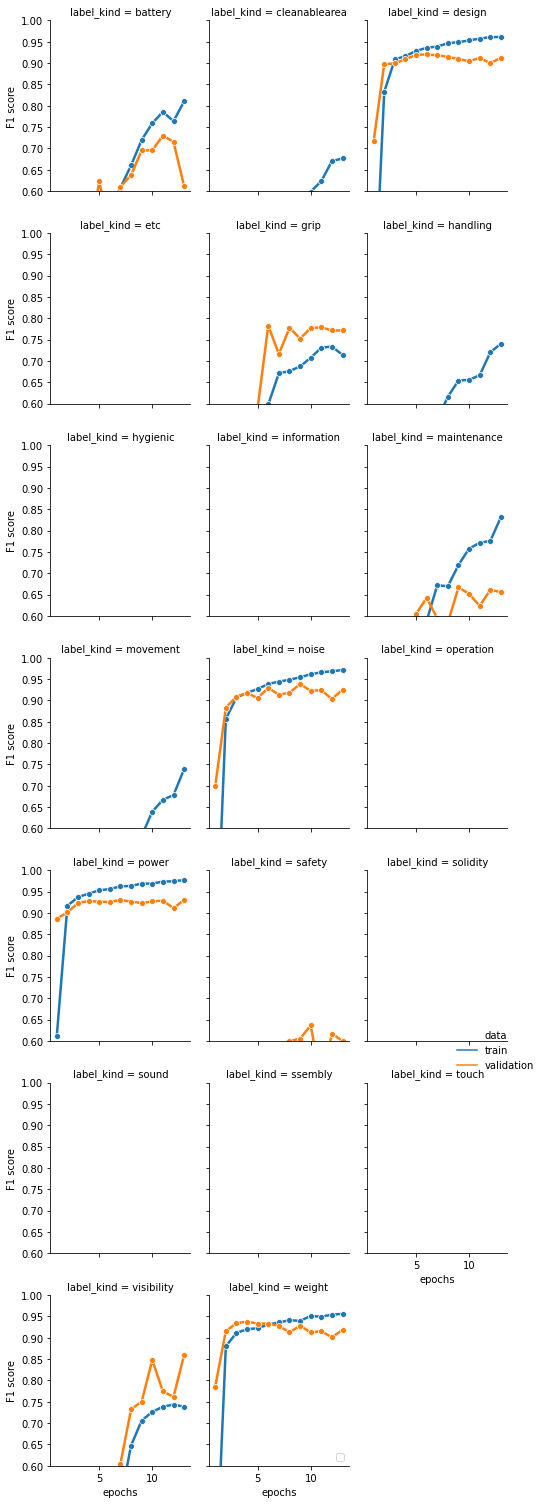

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors

def history_to_value(history, n_label):
    history_out = pd.DataFrame(history.history)
    epochs = history_out.shape[0]
    history_out = history_out.drop('loss', axis=1).stack().reset_index()
    history_out['F1score'] = history_out['level_1'].apply(lambda x: 1 if x.split('_')[-1] =='F1score' else 0)
    history_out['label_kind'] = history_out['level_1'].apply(lambda x: x.split('_')[-2])
    history_out['data'] = history_out['level_1'].apply(lambda x: 'validation' if len(x.split('_')) == 3 else 'train')
    history_out = history_out[history_out['F1score'] == 1][[0, 'label_kind', 'data']].rename(columns={0:'values'}).reset_index(drop=True)
    history_out.sort_values(by=['label_kind', 'data'], inplace=True)
    history_out['epochs'] = list(range(1,epochs+1)) * n_label * 2
    return history_out

def plotDF(history, n_label):
    history_out = history_to_value(history, n_label)
    fig = sns.relplot(data=history_out, x="epochs", y="values", hue="data", col="label_kind", linewidth=2.5, kind='line', col_wrap=3,
                      marker='o', height=3, aspect=0.8)
    plt.legend(loc='lower right')
    leg = fig._legend
    leg.set_bbox_to_anchor([0.9,0.3])
    fig.set(ylim=(0.6, 1), ylabel='F1 score')

plotDF(history, n_label)

In [137]:
best_model = load_model('best_model.h5', custom_objects = {'F1score':F1score})
best_model.evaluate(X_test, y_test_list, batch_size=60)

68/68 [==============================] - 9s 90ms/step - loss: 1.5510 - noise_loss: 0.1133 - sound_loss: 0.0203 - hygienic_loss: 0.0484 - design_loss: 0.1082 - grip_loss: 0.0131 - cleanablearea_loss: 0.0632 - weight_loss: 0.1744 - touch_loss: 0.0068 - handling_loss: 0.0839 - movement_loss: 0.1489 - operation_loss: 0.0755 - ssembly_loss: 0.0431 - maintenance_loss: 0.1024 - information_loss: 0.0185 - power_loss: 0.2085 - battery_loss: 0.0805 - solidity_loss: 0.0770 - safety_loss: 0.0266 - visibility_loss: 0.0207 - etc_loss: 0.1179 - noise_F1score: 0.9348 - sound_F1score: 0.2181 - hygienic_F1score: 0.2672 - design_F1score: 0.9145 - grip_F1score: 0.8033 - cleanablearea_F1score: 0.5498 - weight_F1score: 0.9001 - touch_F1score: 0.0000e+00 - handling_F1score: 0.5387 - movement_F1score: 0.5645 - operation_F1score: 0.1344 - ssembly_F1score: 0.3451 - maintenance_F1score: 0.6573 - information_F1score: 0.2310 - power_F1score: 0.9220 - battery_F1score: 0.6325 - solidity_F1score: 0.0853 - safety_F1sc

[1.5509637594223022,
 0.1133214682340622,
 0.020253226161003113,
 0.048369400203228,
 0.10824400931596756,
 0.013112674467265606,
 0.0632089376449585,
 0.17436102032661438,
 0.006835732143372297,
 0.08385702967643738,
 0.14889083802700043,
 0.07548664510250092,
 0.043067675083875656,
 0.10239561647176743,
 0.01847456768155098,
 0.20845063030719757,
 0.08049146085977554,
 0.07700575143098831,
 0.02657562494277954,
 0.020687254145741463,
 0.11787346750497818,
 0.934807300567627,
 0.2181372493505478,
 0.26715683937072754,
 0.9144752621650696,
 0.8032912611961365,
 0.5498366355895996,
 0.9001317024230957,
 0.0,
 0.5387371182441711,
 0.5645455121994019,
 0.13438375294208527,
 0.34509795904159546,
 0.6572683453559875,
 0.23095238208770752,
 0.921970784664154,
 0.632527768611908,
 0.08529410511255264,
 0.4784313142299652,
 0.6554738879203796,
 0.0]

In [138]:
import matplotlib.pyplot as plt
def simpleaxis(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
  ax.tick_params(axis='both', which='major', labelsize=10)

def predict_review(sentence, max_len=120):
    #Preprocess, Predict
    sentence = sentence.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
    if sentence == '':
        return "리뷰 해석 불가."

    new = twi.morphs(sentence)
    new = [word for word in new if not word in stopwords]
    encoded = list(filter(lambda x: x>0, [tokenizer.word_index.get(i,0) for i in new])) #단어를 인덱스로 바꿈
    pad_new = [0]*(max_len-len(encoded)) + encoded    # 패딩
    scores = [i[0][0] for i in best_model.predict(np.array([pad_new]))] #이전에 학습한 모델로 예측한 후 결과 저장.

    #Visualize
    fig, ax = plt.subplots(1,1, figsize=(12,9))

    x, y = label_names[::-1], scores[::-1]
    colors = ['#E47F2D' if yy > 0.5 else '#747B86' for yy in y]  ##확률이 0.5 넘는 경우 주황색
    ax.barh(x, y, color=colors, height=0.5)
    ax.set_title("Category")
    ax.set_xlim(0,1)
    for i in range(20):
        ax.text(y[i]+0.01, x[i], '{:.2f}%'.format(y[i]*100), verticalalignment='center')
    simpleaxis(ax)

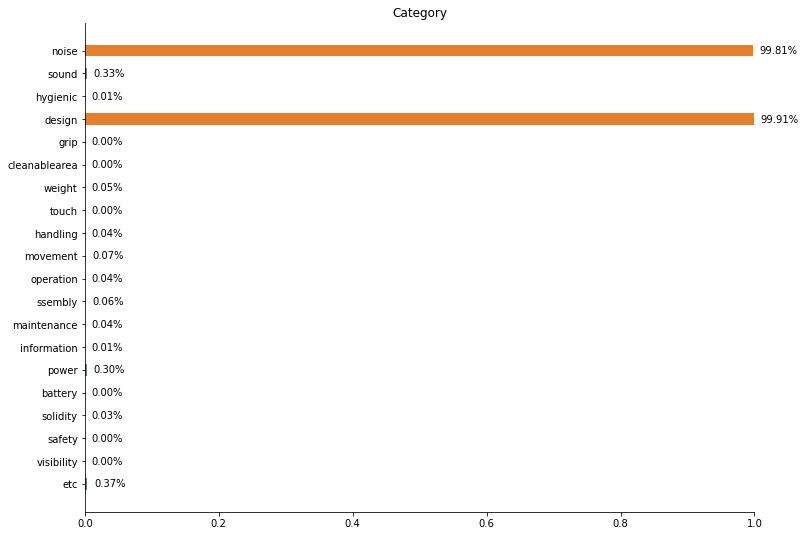

In [139]:
text = "디자인도 맘에들어요 소음도 작고 잘산것같아요"
predict_review(text)

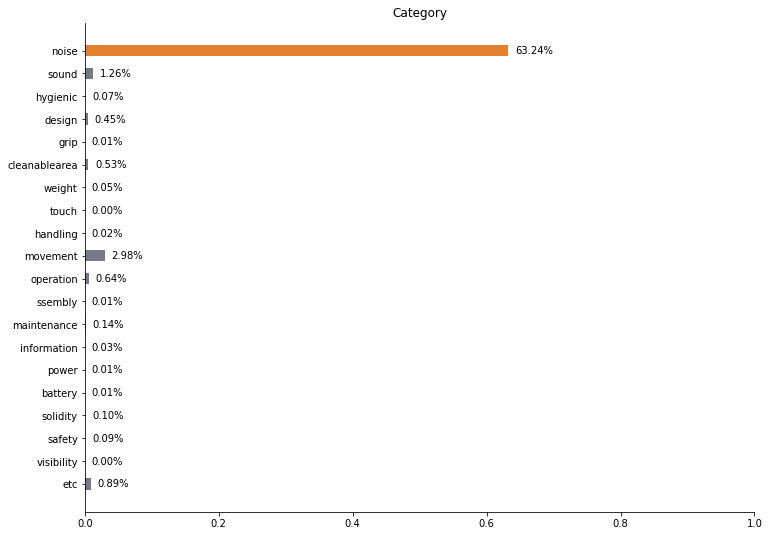

In [140]:
text = "소음이 커서 너무 별로예요"
predict_review(text)

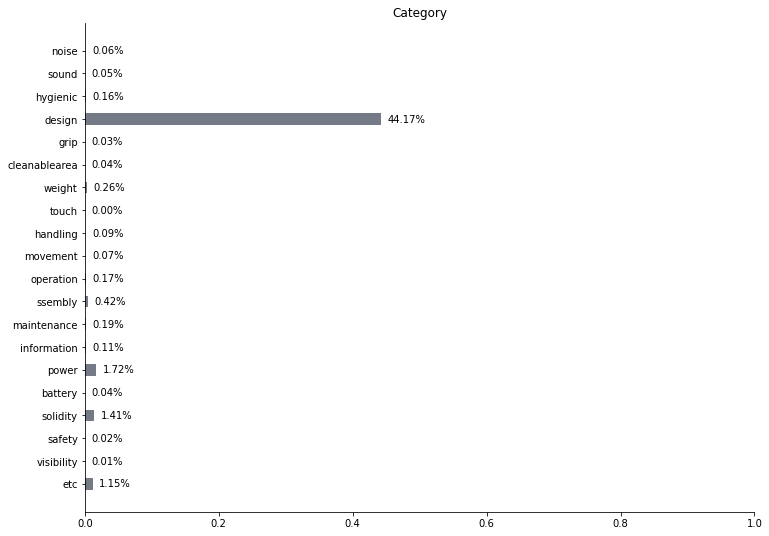

In [141]:
text = "공간 내부도 효율이 떨어지고 너무 시끄럽지만 예뻐요"
predict_review(text)

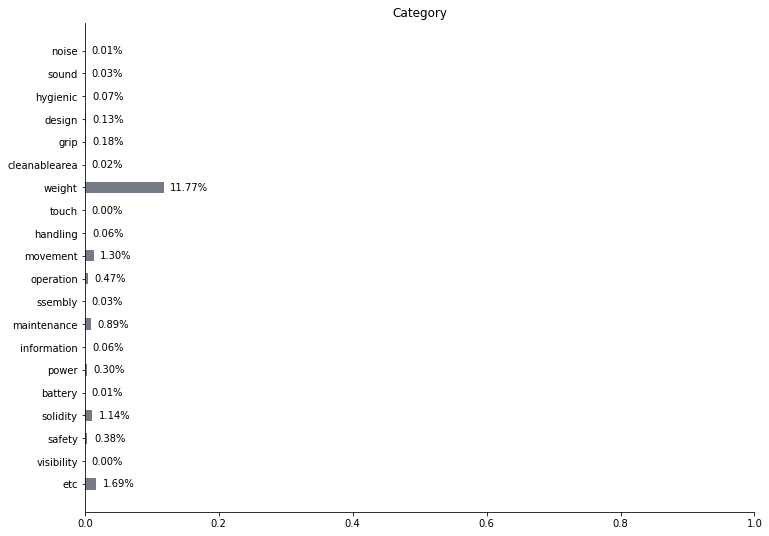

In [142]:
text = "조명이 어두워요"
predict_review(text)

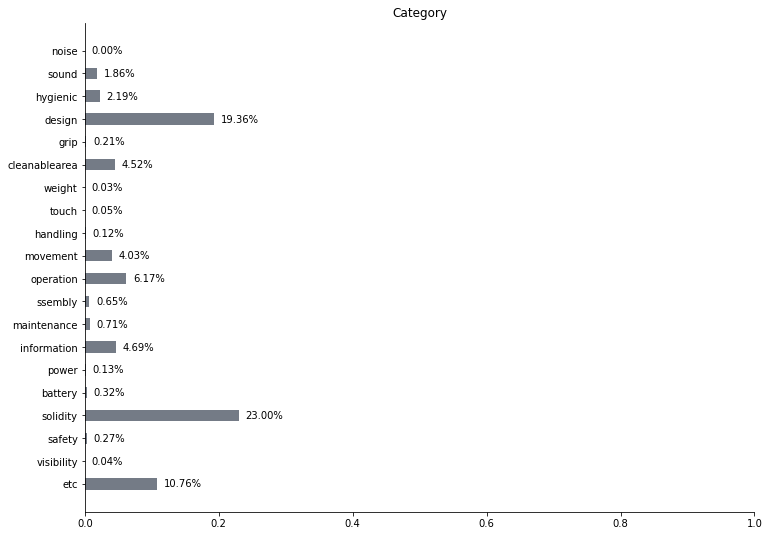

In [143]:
text = "냉장고문 열고 닫는게 편리해요"
predict_review(text)